My first Jupyter Notebook

The intention here is to analyse the data coming out of Contemplas Templo, and create a workflow that can be automated based on this data.

!Do some formatting!

First I need to import the libraries I need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now I need to load in some data

In [13]:
myfile = 'J-20220927-093421.txt'
dataFrame = pd.read_csv(myfile,sep='\t',header=(0), dtype='float32')

Lets examine this data frame

In [14]:
dataFrame.describe()

,fx12,fx34,fy14,fy23,fz1,fz2,fz3,fz4,fx,fy,fz,mx,my,mz,msx,msy,ax,ay,tz
count,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000
mean,0.066052,-0.018081,0.060937,-0.072176,0.067440,0.168112,0.276186,-0.001202,3.071110,-0.718891,72.263313,-1.535575,9.365444,0.009670,-1.519727,9.433017,-0.017446,-0.001468,-0.121470
std,0.168079,0.054492,0.171376,0.151572,0.197398,0.481835,0.812544,0.001566,9.776709,8.513172,209.346191,9.044991,27.044271,0.648264,9.155499,27.253666,0.046795,0.020217,0.489725
min,-0.180000,-0.433000,-0.278000,-0.697000,-0.160000,-0.003000,-0.053000,-0.012000,-13.718000,-39.894001,-3.891000,-56.618999,-0.579000,-4.150000,-57.021999,-0.561000,-1.180000,-0.207000,-9.233000
25%,0.008000,-0.018000,0.010000,-0.030000,-0.001000,0.000000,-0.001000,-0.002000,-0.084000,-0.156000,-0.478000,-0.009000,-0.012000,-0.044000,-0.003000,-0.012000,0.000000,0.000000,0.000000
50%,0.017000,-0.016000,0.026000,-0.028000,0.000000,0.000000,0.000000,-0.001000,-0.006000,-0.078000,-0.262000,0.051000,0.033000,-0.021000,0.053000,0.032000,0.000000,0.000000,0.000000
75%,0.019000,-0.008000,0.028000,-0.013000,0.001000,0.001000,0.001000,0.000000,0.072000,-0.019000,-0.046000,0.098000,0.086000,0.003000,0.102000,0.082000,0.000000,0.000000,0.000000
max,0.825000,0.140000,0.944000,0.102000,0.910000,2.013000,3.814000,0.024000,44.000000,38.058998,876.513977,16.410000,120.974998,4.627000,17.089001,121.834000,0.000000,0.742000,3.742000


In [15]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fx12    8416 non-null   float32
 1   fx34    8416 non-null   float32
 2   fy14    8416 non-null   float32
 3   fy23    8416 non-null   float32
 4   fz1     8416 non-null   float32
 5   fz2     8416 non-null   float32
 6   fz3     8416 non-null   float32
 7   fz4     8416 non-null   float32
 8   fx      8416 non-null   float32
 9   fy      8416 non-null   float32
 10  fz      8416 non-null   float32
 11  mx      8416 non-null   float32
 12  my      8416 non-null   float32
 13  mz      8416 non-null   float32
 14  msx     8416 non-null   float32
 15  msy     8416 non-null   float32
 16  ax      8416 non-null   float32
 17  ay      8416 non-null   float32
 18  tz      8416 non-null   float32
dtypes: float32(19)
memory usage: 624.8 KB


In [16]:
dataFrame.head()

,fx12,fx34,fy14,fy23,fz1,fz2,fz3,fz4,fx,fy,fz,mx,my,mz,msx,msy,ax,ay,tz
0,0.018,-0.018,0.028,-0.028,0.000,0.000,-0.003,0.000,-0.006,-0.019,-0.391,0.098,-0.088,0.002,0.099,-0.088,0.0,0.0,0.0
1,0.020,-0.017,0.027,-0.029,0.000,0.001,0.000,0.000,0.170,-0.117,0.127,0.051,0.018,-0.021,0.053,0.022,0.0,0.0,0.0
2,0.019,-0.019,0.028,-0.029,0.000,-0.001,-0.002,-0.001,0.013,-0.078,-0.435,0.063,-0.050,-0.042,0.064,-0.049,0.0,0.0,0.0
3,0.020,-0.019,0.027,-0.030,0.000,0.000,-0.002,0.000,0.052,-0.195,-0.305,0.051,-0.042,-0.036,0.055,-0.041,0.0,0.0,0.0
4,0.019,-0.019,0.027,-0.028,0.001,0.002,-0.002,-0.001,-0.006,-0.097,-0.089,0.229,0.026,-0.054,0.231,0.026,0.0,0.0,0.0


So this data frame has 8416 data points, all of which are non-null, which are float64 type. This type is not needed as I only need a float with from 1000 to -0.001 as our max data value is 876.5 and I do not need so many decimal points, so I changed this to float32

Next I shall plot the data as is and see what we have to work with. I am only interested in fx, fy, fz, mx, my and mz. I have been told that the origin is located in the middle of the plate, slightly below the force plate. At some point, I will need to work out how far below the force plate it is.

<AxesSubplot:>

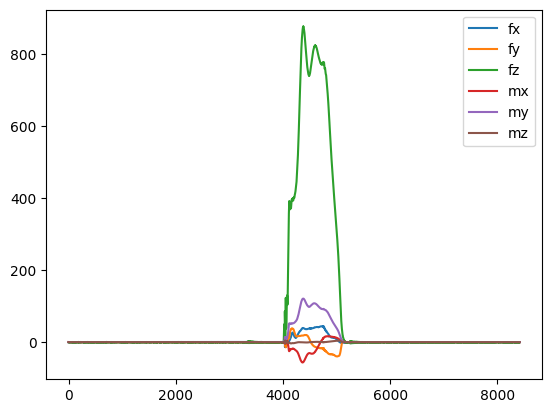

In [20]:
dataFrame[['fx','fy','fz','mx','my','mz']].plot()

Lets window this data some what so I can see the areas I'm interested in. I want to make this repeatable, so don't want to hard code the locations 4000 to 6000. It seems reasonable to use Fz where these values are above noise level - lets start by saying 5N. I will then add 50 frames either side of this

In [74]:
data_window = dataFrame.index[dataFrame['fz'] > 5]
max_index = data_window.max()
min_index = data_window.min()

data_window_array = data_window.to_numpy()

truncate_above = np.arange(max_index+1,max_index+51)
truncate_below = np.arange(min_index-51,min_index-1)

final_data_window = np.concatenate((truncate_below, data_window_array, truncate_above))
df_windowed = dataFrame[['fx','fy','fz','mx','my','mz']].iloc[final_data_window]
df_windowed_exact = dataFrame[['fx','fy','fz','mx','my','mz']].iloc[data_window_array]

Now lets replot with data

<AxesSubplot:>

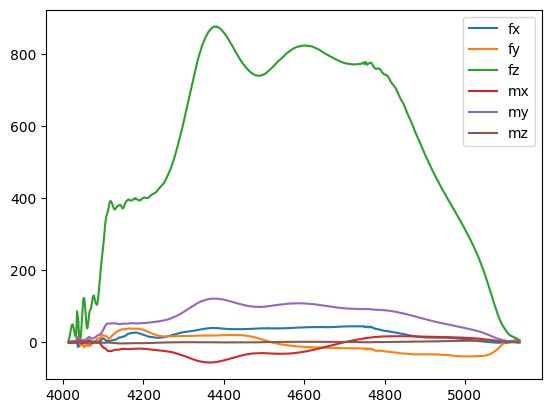

In [76]:
df_windowed_exact.plot()

At some point I need to filter this data, but it doesn't look too bad, so will leave it for now. The next thing to do is try to calcuate magnitude and direction of force vector, as well as the centre of pressure on the force plate.

Lets start with magnitude in the sagittal and coronal planes

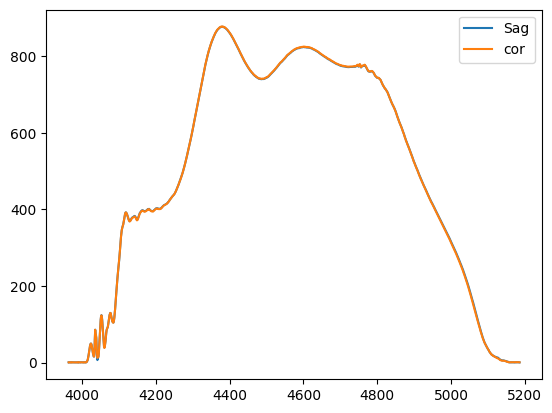

In [71]:
cor_force_magnitude = (df_windowed['fz']**2 + df_windowed['fx']**2)**0.5
sag_force_magnitude = (df_windowed['fz']**2 + df_windowed['fy']**2)**0.5
sag_force_magnitude.plot(label='Sag')
cor_force_magnitude.plot(label='cor')
plt.legend()

There is very little x and y component differences, therefore the magnitude of the force vector is almost exactly the same in the coronal plane and sagittal plane. This is to be expected.

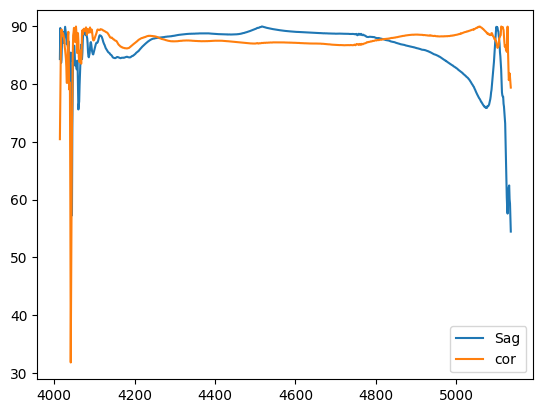

In [75]:
cor_force_direction = np.absolute(np.degrees(np.arctan(df_windowed_exact['fz'] / df_windowed_exact['fx'])))
sag_force_direction = np.absolute(np.degrees(np.arctan(df_windowed_exact['fz'] / df_windowed_exact['fy'])))
sag_force_direction.plot(label='Sag')
cor_force_direction.plot(label='cor')
plt.legend()

Alright, this data is looking a little bit hectic where it looks like the impulse has created some high frequency noise, so lets have a go a filtering this using a butterworth filter

In [77]:
df_windowed_exact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 4014 to 5136
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fx      1121 non-null   float32
 1   fy      1121 non-null   float32
 2   fz      1121 non-null   float32
 3   mx      1121 non-null   float32
 4   my      1121 non-null   float32
 5   mz      1121 non-null   float32
dtypes: float32(6)
memory usage: 35.0 KB


In [114]:
from scipy.signal import butter,filtfilt
# Filter requirements.
T = 1.121         # Sample Period
fs = 1000      # sample rate, Hz
cutoff = 25      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples
cutoff / nyq

0.05

In [117]:
normal_cutoff = cutoff / nyq
# Get the filter coefficients 
b, a = butter(order, normal_cutoff, btype='low', analog=False)
fx = filtfilt(b, a, df_windowed_exact['fx'])
fy = filtfilt(b, a, df_windowed_exact['fy'])
fz = filtfilt(b, a, df_windowed_exact['fz'])
mx = filtfilt(b, a, df_windowed_exact['mx'])
my = filtfilt(b, a, df_windowed_exact['my'])
mz = filtfilt(b, a, df_windowed_exact['mz'])


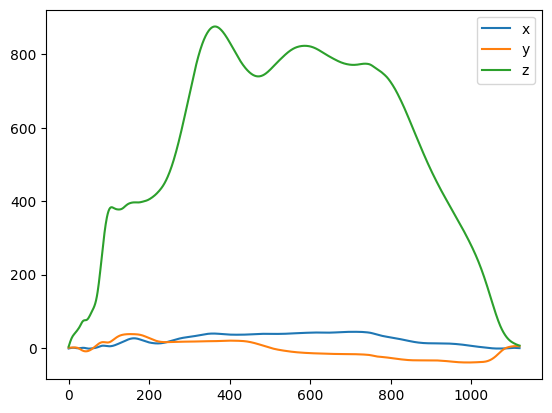

In [141]:
plt.plot(fx,label='x')
plt.plot(fy,label='y')
plt.plot(fz,label='z')
plt.legend()

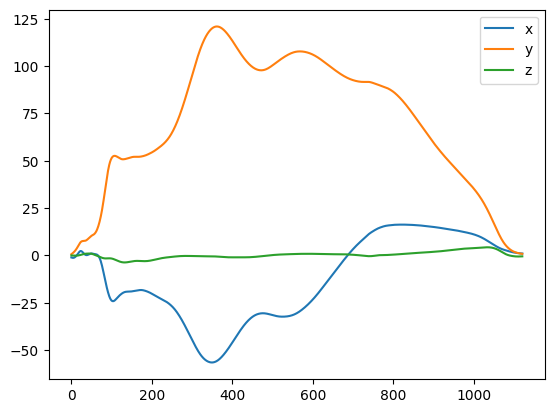

In [143]:
plt.plot(mx,label='x')
plt.plot(my,label='y')
plt.plot(mz,label='z')
plt.legend()

Now we have filtered the data, lets have a look to to see how our force vector directions looks

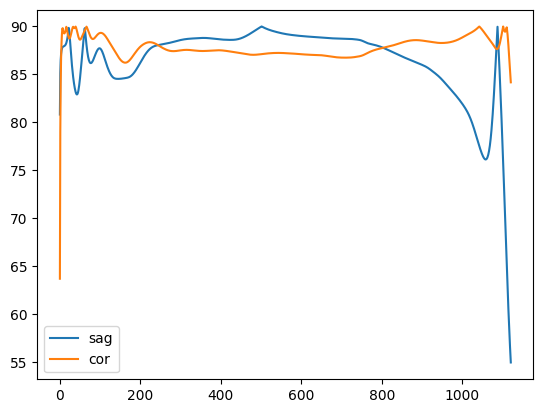

In [144]:
cor_force_direction = np.absolute(np.degrees(np.arctan(fz / fx)))
sag_force_direction = np.absolute(np.degrees(np.arctan(fz / fy)))
plt.plot(sag_force_direction, label='sag')
plt.plot(cor_force_direction, label='cor')
plt.legend()

Ok, this is looking a bit better, now I need to figure out how to get the centre of pressure. This can be done using the moments and basic mechanics.
I know the moment in x and the force in x therefore I know the moment arm in the x direction, etc. To do this I will work with the raw unfiltered data and see how that looks first before filtering it.

In [125]:
df_windowed_exact['copx'] = df_windowed_exact['mx'] / df_windowed_exact['fx']
df_windowed_exact['copy'] = df_windowed_exact['my'] / df_windowed_exact['fy']
df_windowed_exact['copz'] = df_windowed_exact['mz'] / df_windowed_exact['fz']

In [131]:
df_windowed_exact.describe()

,fx,fy,fz,mx,my,mz,copx,copy,copz
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,23.267395,-4.872623,544.639526,-11.866454,70.161209,0.212629,-0.867933,-1.344858,0.000694
std,15.717758,22.898134,267.621185,22.167454,35.031647,1.761306,12.318347,30.554552,0.013318
min,-13.718000,-39.894001,5.138000,-56.618999,0.737000,-4.150000,-283.666656,-859.641052,-0.153028
25%,10.658000,-24.337999,375.072998,-30.660000,50.036999,-0.720000,-1.384468,-3.729575,-0.001237
50%,25.209999,-7.358000,620.976990,-12.020000,78.153999,0.144000,-0.775029,-0.828562,0.000258
75%,38.237999,16.980000,776.286011,10.161000,100.183998,0.829000,0.479502,3.928438,0.001833
max,44.000000,38.058998,876.513977,16.410000,120.974998,4.627000,119.999992,302.442780,0.126310


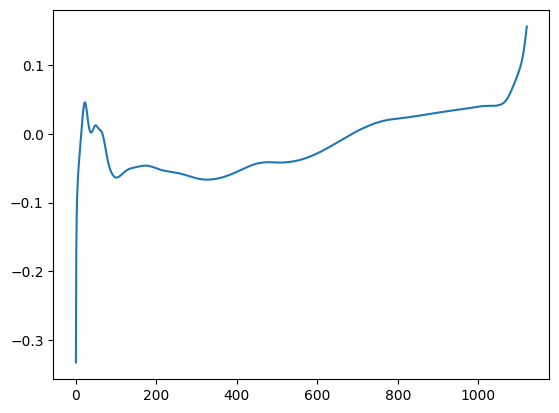

In [159]:
plt.plot(mx/fz)